In [1]:
# Required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# scikit-learn : the python library for machine learning tasks
import sklearn 

In [32]:
# load dataset
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [33]:
#extract features matrix ( the X)
X_iris = iris.drop('species', axis=1) # drop species coz we will predict based on it; the independent variable
X_iris.head(); X_iris.shape

(150, 4)

In [34]:
# import the target array ( the Y)
y_iris = iris['species']
y_iris.head(); y_iris.shape

(150,)

In [35]:
# split the data into a training set and a testing set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [36]:
##############################################################################################################
########################## Unsupervised learning: Iris clustering ################################
##############################################################################################################

In [37]:
# we will use clustering method called a Gaussian mixture model (GMM)
from sklearn.mixture import GaussianMixture # 1. choose model
model = GaussianMixture(n_components=3, covariance_type='full') # 2. hyperparameters
model.fit(X_iris) # fit model to data
y_gmm = model.predict(X_iris) # determine the cluster labels

### Add a new coulmn 'cluster'
iris['cluster'] = y_gmm
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        1
2           4.7          3.2           1.3          0.2  setosa        1
3           4.6          3.1           1.5          0.2  setosa        1
4           5.0          3.6           1.4          0.2  setosa        1

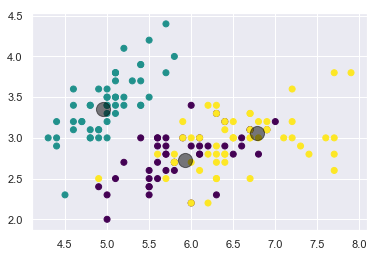

In [38]:
#plot the results

sns.set()
plt.scatter(iris.sepal_length, iris.sepal_width, c=y_gmm, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

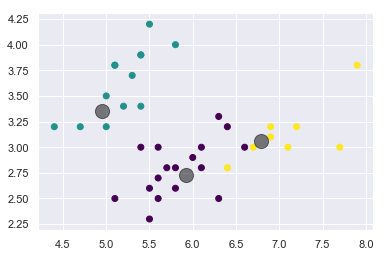

In [39]:
# clustering using k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xtrain)
y_kmeans = kmeans.predict(Xtest)

# plotting
plt.scatter(Xtest.sepal_length, Xtest.sepal_width, c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [40]:
##############################################################################################################
########################## Unsupervised learning example: Iris dimensionality ################################
##############################################################################################################

In [41]:
# ask whether there is a suitable lower dimensional representation that retains the essential features of the data.
# using PCA (Principal Component Analysis)
# We will ask the model to return two components—that is, a two-dimensional representation of the data.
from sklearn.decomposition import PCA # 1. choose model
model = PCA(n_components=2) # 2. hyperparameters
model.fit(X_iris) # 3. Fit to data. y not specified here
X_2D = model.transform(X_iris) # 4. Transform from 4D to 2D

In [43]:
# add 2 new columns to the dataset
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  cluster  \
0           5.1          3.5           1.4          0.2  setosa        1   
1           4.9          3.0           1.4          0.2  setosa        1   
2           4.7          3.2           1.3          0.2  setosa        1   
3           4.6          3.1           1.5          0.2  setosa        1   
4           5.0          3.6           1.4          0.2  setosa        1   

       PCA1      PCA2  
0 -2.684126  0.319397  
1 -2.714142 -0.177001  
2 -2.888991 -0.144949  
3 -2.745343 -0.318299  
4 -2.728717  0.326755

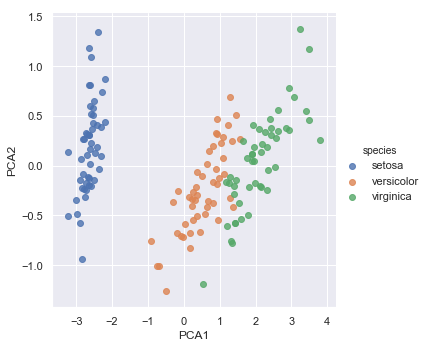

In [44]:
# plot the results
sns.lmplot("PCA1","PCA2", hue='species', data=iris, fit_reg=False); # the iris data projected in 2 dimensions